# Assignment 9: Approximation of the Probability Distributions

---
## Background

### Problem Analysis
Normally, hypotheses should be formulated upfront. However, let us make a few exceptions. Based on the data in Tables 3 and 4:
1. Formulate interesting hypotheses and perform an analysis. The assumption for this assignment is that the analysis should be interesting and relevant from the perspective of publishing a paper at an international conference.
2. Perform Bayesian hypothesis tests of the hypotheses formulated or inferred during step 1. Divide the data in each table into two sets by random sampling without replacement. Let one set from each table represent Empirical Data Batch 1 and let the other set from each table represent Empirical Data Batch 2. Assign (subjective) a priori probabilities that the formulated hypotheses (the null hypothesis and alternative hypothesis/hypotheses for each table) from experience or by using the lottery approach. Compute a posteriori probabilities by using Empirical Data Batch 1 and the a priori probabilities. Use the resulting probabilities as a priori probabilities and, again, compute a posteriori probabilities but now by using Empirical Data Batch 2. What conclusion can be drawn when analysing the difference between your first subjective probabilities and the last a posteriori probabilities for each hypothesis?

### The Methods
All involved methods except for bayesian hypothesis testing have been explained in previous assignments.

#### Bayesian
Bayesian hypothesis testing evaluates the probability of a hypothesis being true ($H_1$) given some observed data, using Bayes’ theorem to update prior beliefs with likelihoods derived from the data. Unlike traditional methods, it provides a posterior probability that quantifies the strength of evidence for $H_1$ versus the null hypothesis, accommodating prior knowledge and uncertainty.

Bayes' theorem is: 
$$P(H_1\mid D) =\frac{P(D \mid H_1) \cdot P(H_1)}{P(D\mid H_1) \cdot P(H_1) + P(D \mid H_0)\cdot P(H_0)}$$
with:
- $P(H_1\mid D):$ Posterior probability, so the probability of $H_1$ given $D$
- $P(D \mid H):$ Likelihood, so the probability of data $D$ given, that $H_1$ is true
- $P(H):$ Prior probability, so the initial belief about the hypothesis
- $P(D \mid H_0):$ Likelihood of the data under the null hypothesis
- $P(H_0):$ Prior probability of the null hypothesis

---
## Solution

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np


df_3 = pd.read_csv('data/table_3.csv', delimiter=";")
df_3.head()

,Subject,Line,SE,Prog.,PSP,C,C++,Courses
0,1,1,2,1,2,1,1,2
1,2,1,3,2,1,2,1,4
2,3,2,3,2,2,2,2,7
3,4,1,3,2,3,2,1,3
4,5,1,3,2,3,2,1,5


In [2]:
df_4 = pd.read_csv('data/table_4.csv', delimiter=";")
df_4.head()

,Subject,Size in LOC,Time,Prod.,Faults,Faults/ KLOC,Pred. Size,Pred.
0,1,839,3657,13.8,53,63.2,39.7,20.2
1,2,1249,3799,19.7,56,44.8,44.1,21.2
2,3,968,1680,34.6,71,73.3,29.1,25.1
3,4,996,4357,13.7,35,35.1,24.3,18.0
4,5,794,2011,23.7,32,40.3,26.0,13.2


## 9.1 Formulate hypotheses

In [3]:
merged_data = pd.merge(df_3, df_4, on='Subject')
merged_data.head()

,Subject,Line,SE,Prog.,PSP,C,C++,Courses,Size in LOC,Time,Prod.,Faults,Faults/ KLOC,Pred. Size,Pred.
0,1,1,2,1,2,1,1,2,839,3657,13.8,53,63.2,39.7,20.2
1,2,1,3,2,1,2,1,4,1249,3799,19.7,56,44.8,44.1,21.2
2,3,2,3,2,2,2,2,7,968,1680,34.6,71,73.3,29.1,25.1
3,4,1,3,2,3,2,1,3,996,4357,13.7,35,35.1,24.3,18.0
4,5,1,3,2,3,2,1,5,794,2011,23.7,32,40.3,26.0,13.2


We work on three hypotheses:
- Hypothesis 1: Industrial experience and productivity
- Hypothesis 2: General programm knowledge and prediction accuracy
- Hypothesis 3: Study subject and fault density

#### Hypothesis 1: Industrial experience and productivity
$H$ = Industrial experience positively impacts productivity  
$H_0$ = Industrial experience does not impact productivity

We will directly employ Spearman, as C and C++ are not continuous (excluding Pearson), and since Prod. is continuous.
**Assumptions**
- Assumption 1: Variables are at least ordinal -> Yes, the variables C, C++ are ordinal and Prod. is continuous
- Assumption 2: Paired observations -> Yes, the data is paired by the Subject column
- Assumption 3: Monotonic relationship -> Don't know yet, need to plot

<Axes: xlabel='C++'>

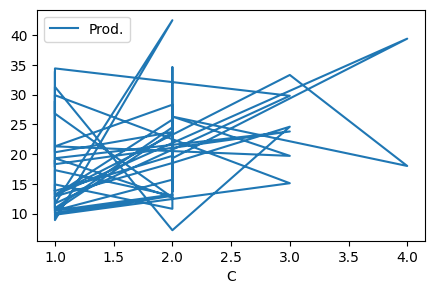

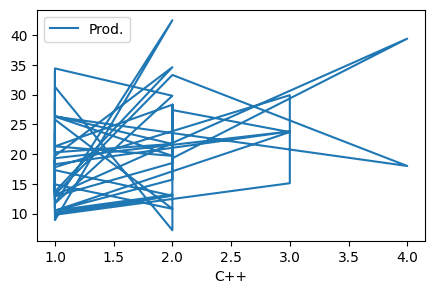

In [4]:
merged_data.plot(x='C', y='Prod.', figsize=(5,3))
merged_data.plot(x='C++', y='Prod.', figsize=(5,3))

I would interpret this as an in general increasing relationship. For both variable combinations. Hence we can continue with Spearman.

In [5]:
# Correlation between C and Prod. with spearman
correlation, p_value = stats.spearmanr(merged_data['C'], merged_data['Prod.'])
print(f"Correlation between C and Prod. with spearman correlation coefficient: {correlation} and p-value: {p_value}")

# Correlation between C++ and Prod. with spearman
correlation, p_value = stats.spearmanr(merged_data['C++'], merged_data['Prod.'])
print(f"Correlation between C++ and Prod. with spearman correlation coefficient: {correlation} and p-value: {p_value}")

Correlation between C and Prod. with spearman correlation coefficient: 0.3120752408166633 and p-value: 0.014347262829020622
Correlation between C++ and Prod. with spearman correlation coefficient: 0.31036754918857523 and p-value: 0.014918726251941423


### Interpretation
Since the p-value is well below 0.05 for both variable, industry experience seems to have a positive impact on productivity.

### Hypothesis 2: General programm knowledge and prediction accuracy
$H$ = More general programming knowledge positively impacts prediction accuracy  
$H_0$ = More general programming knowledge does not impact prediction accuracy


We will directly employ Spearman, as Prog. is not continuous (excluding Pearson), and since Pred. Size and Pred. Time are continuous.
**Assumptions**
- Assumption 1: Variables are at least ordinal -> Yes, the variable Prog. is ordinal and Pred. Size and Pred. Time is continuous
- Assumption 2: Paired observations -> Yes, the data is paired by the Subject column
- Assumption 3: Monotonic relationship -> Don't know yet, need to plot

<Axes: xlabel='Prog.'>

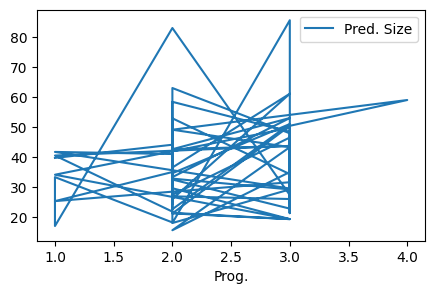

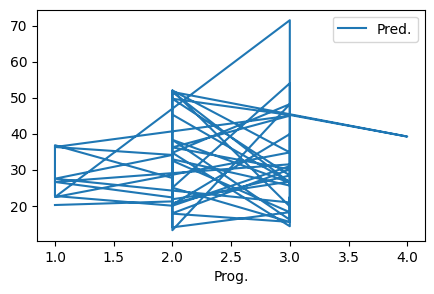

In [6]:
merged_data.plot(x='Prog.', y='Pred. Size', figsize=(5,3))
merged_data.plot(x='Prog.', y='Pred.', figsize=(5,3))

The plot here is not conclusive, as there is many up and downward trends. I will nevertheless employ spearman.

In [7]:
# Correlation between Prog. and Pred. Size with spearman
correlation, p_value = stats.spearmanr(merged_data['Prog.'], merged_data['Pred. Size'])
print(f"Correlation between Prog. and Pred. Size with spearman correlation coefficient: {correlation} and p-value: {p_value}")

# Correlation between C++ and Prod. with spearman
correlation, p_value = stats.spearmanr(merged_data['Prog.'], merged_data['Pred.'])
print(f"Correlation between Prog. and Pred. Time with spearman correlation coefficient: {correlation} and p-value: {p_value}")

Correlation between Prog. and Pred. Size with spearman correlation coefficient: 0.20696135161487314 and p-value: 0.10951880254599607
Correlation between Prog. and Pred. Time with spearman correlation coefficient: 0.044196173693705466 and p-value: 0.735206910744336


#### Interpretation
The p-values are above 0.05 in both cases hinting towards no impact of general programming knowledge on the predictions.

### Hypothesis 3: Study subject and fault density
$H$ = Computer science students produce less faults per 1000 lines of code  
$H_0$ = The study subject has not impact on faults per 1000 lines of code

As we have to differnt groups, computer science and electrical engineering, we can compare between those two. Hence we will employ the Mann-Whitney U test.

In [8]:
computer_science = merged_data[merged_data['Line'] == 1]['Faults/ KLOC']
electrical_engineers = merged_data[merged_data['Line'] == 2]['Faults/ KLOC']

# Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(computer_science, electrical_engineers, alternative='less')
print(f"Mann-Whitney U test statistic: {statistic} and p-value: {p_value}")

# Confidence interval for the difference of means
mean_diff = computer_science.mean() - electrical_engineers.mean()
std_diff = np.sqrt(computer_science.var() / computer_science.size + electrical_engineers.var() / electrical_engineers.size)
z = 1.96
lower_bound = mean_diff - z * std_diff
upper_bound = mean_diff + z * std_diff
print(f"Confidence interval for the difference of means: [{lower_bound}, {upper_bound}]")

Mann-Whitney U test statistic: 332.5 and p-value: 0.03365148311793969
Confidence interval for the difference of means: [-30.435505183324537, 24.46535267787793]


#### Interpretation
- As the p-value is below 0.05, we assume, that computer science students produce less faults per 1000 lines of code
- However, looking at the confidence interval for the means highlights the fact, that the study subject seems to not have an impact on the faults per 1000 lines of code

### 9.2 Bayesian Hypothesis Testing

In [9]:
def compute_posterior(a_priori, likelihood_h_given_d, likelihood_not_h_given_d):
    return (a_priori * likelihood_h_given_d) / (
        a_priori * likelihood_h_given_d + (1 - a_priori) * likelihood_not_h_given_d
    )

# Divide the data into two empirical batches (random sampling without replacement)
batch_1_table_3 = df_3.sample(frac=0.5, random_state=42)
batch_2_table_3 = df_3.drop(batch_1_table_3.index)

batch_1_table_4 = df_4.sample(frac=0.5, random_state=42)
batch_2_table_4 = df_4.drop(batch_1_table_4.index)

batch_1 = pd.merge(batch_1_table_3, batch_1_table_4, on='Subject')
batch_2 = pd.merge(batch_2_table_3, batch_2_table_4, on='Subject')

a_priori_probs = {
    "Hypothesis 1": 0.7,
    "Hypothesis 2": 0.3,
    "Hypothesis 3": 0.5
}

#### Hypothesis 1: Industrial experience and productivity

In [10]:
correlation_c_batch_1, _ = stats.spearmanr(batch_1['C'], batch_1['Prod.'])
correlation_cpp_batch_1, _ = stats.spearmanr(batch_1['C++'], batch_1['Prod.'])

# Normalize correlation to likelihood (transform [-1,1] to [0,1])
def correlation_to_likelihood(correlation):
    return (correlation + 1) / 2

likelihood_h1_batch_1 = correlation_to_likelihood((correlation_c_batch_1 + correlation_cpp_batch_1) / 2)
likelihood_not_h1_batch_1 = 1 - likelihood_h1_batch_1

prior_h1 = a_priori_probs["Hypothesis 1"]

posterior_h1_batch_1 = compute_posterior(prior_h1, likelihood_h1_batch_1, likelihood_not_h1_batch_1)

correlation_c_batch_2, _ = stats.spearmanr(batch_1['C'], batch_1['Prod.'])
correlation_cpp_batch_2, _ = stats.spearmanr(batch_1['C++'], batch_1['Prod.'])

likelihood_h1_batch_2 = correlation_to_likelihood((correlation_c_batch_2 + correlation_cpp_batch_2) / 2)
likelihood_not_h1_batch_2 = 1 - likelihood_h1_batch_2

posterior_h1_batch_2 = compute_posterior(posterior_h1_batch_1, likelihood_h1_batch_2, likelihood_not_h1_batch_2)

bayesian_hypothesis_1_results = {
    "Prior (Initial)": prior_h1,
    "Likelihood (Batch 1)": {
        "P(D|H1)": likelihood_h1_batch_1,
        "P(D|~H1)": likelihood_not_h1_batch_1
    },
    "Posterior (Batch 1)": posterior_h1_batch_1,
    "Likelihood (Batch 2)": {
        "P(D|H1)": likelihood_h1_batch_2,
        "P(D|~H1)": likelihood_not_h1_batch_2
    },
    "Posterior (Batch 2)": posterior_h1_batch_2,
}

bayesian_hypothesis_1_results

{'Prior (Initial)': 0.7,
 'Likelihood (Batch 1)': {'P(D|H1)': 0.5631550264039669,
  'P(D|~H1)': 0.43684497359603314},
 'Posterior (Batch 1)': 0.7504988187919903,
 'Likelihood (Batch 2)': {'P(D|H1)': 0.5631550264039669,
  'P(D|~H1)': 0.43684497359603314},
 'Posterior (Batch 2)': 0.7949867758088361}

##### Interpretation
The probability for H1 to be true is higher than anticipated.

### Hypothesis 2: General programm knowledge and prediction accuracy

In [11]:
correlation_pred_size_batch_1, _ = stats.spearmanr(batch_1['Prog.'], batch_1['Pred. Size'])
correlation_pred_batch_1, _ = stats.spearmanr(batch_1['Prog.'], batch_1['Pred.'])

# Normalize correlation to likelihood (transform [-1,1] to [0,1])
def correlation_to_likelihood(correlation):
    return (correlation + 1) / 2

likelihood_h2_batch_1 = correlation_to_likelihood((correlation_pred_size_batch_1 + correlation_pred_batch_1) / 2)
likelihood_not_h2_batch_1 = 1 - likelihood_h2_batch_1

prior_h2 = a_priori_probs["Hypothesis 2"]

posterior_h2_batch_1 = compute_posterior(prior_h2, likelihood_h2_batch_1, likelihood_not_h2_batch_1)

correlation_pred_size_batch_2, _ = stats.spearmanr(batch_1['Prog.'], batch_1['Pred. Size'])
correlation_pred_batch_2, _ = stats.spearmanr(batch_1['Prog.'], batch_1['Pred.'])

likelihood_h2_batch_2 = correlation_to_likelihood((correlation_pred_size_batch_2 + correlation_pred_batch_2) / 2)
likelihood_not_h2_batch_2 = 1 - likelihood_h2_batch_2

posterior_h2_batch_2 = compute_posterior(posterior_h2_batch_1, likelihood_h2_batch_2, likelihood_not_h2_batch_2)

bayesian_hypothesis_2_results = {
    "Prior (Initial)": prior_h2,
    "Likelihood (Batch 1)": {
        "P(D|H1)": likelihood_h2_batch_1,
        "P(D|~H1)": likelihood_not_h2_batch_1
    },
    "Posterior (Batch 1)": posterior_h2_batch_1,
    "Likelihood (Batch 2)": {
        "P(D|H1)": likelihood_h2_batch_2,
        "P(D|~H1)": likelihood_not_h2_batch_2
    },
    "Posterior (Batch 2)": posterior_h2_batch_2,
}

bayesian_hypothesis_1_results

{'Prior (Initial)': 0.7,
 'Likelihood (Batch 1)': {'P(D|H1)': 0.5631550264039669,
  'P(D|~H1)': 0.43684497359603314},
 'Posterior (Batch 1)': 0.7504988187919903,
 'Likelihood (Batch 2)': {'P(D|H1)': 0.5631550264039669,
  'P(D|~H1)': 0.43684497359603314},
 'Posterior (Batch 2)': 0.7949867758088361}

##### Interpretation
The probability for H2 to be true is higher than anticipated, especially, since the significance test yielded no significant results.

### Hypothesis 3: Study subject and fault density

In [12]:
batch_1_faults_cs = batch_1[batch_1["Line"] == 1]["Faults/ KLOC"]
batch_1_faults_ee = batch_1[batch_1["Line"] == 2]["Faults/ KLOC"]

batch_2_faults_cs = batch_2[batch_2["Line"] == 1]["Faults/ KLOC"]
batch_2_faults_ee = batch_2[batch_2["Line"] == 2]["Faults/ KLOC"]

u_stat_batch_1, p_value_batch_1 = stats.mannwhitneyu(batch_1_faults_cs, batch_1_faults_ee, alternative='less')
u_stat_batch_2, p_value_batch_2 = stats.mannwhitneyu(batch_2_faults_cs, batch_2_faults_ee, alternative='less')


likelihood_h3_batch_1 = 1 - p_value_batch_1
likelihood_not_h3_batch_1 = p_value_batch_1

likelihood_h3_batch_2 = 1 - p_value_batch_2
likelihood_not_h3_batch_2 = p_value_batch_2

prior_h3 = a_priori_probs["Hypothesis 3"]

posterior_h3_batch_1 = compute_posterior(prior_h3, likelihood_h3_batch_1, likelihood_not_h3_batch_1)

posterior_h3_batch_2 = compute_posterior(posterior_h3_batch_1, likelihood_h3_batch_2, likelihood_not_h3_batch_2)

bayesian_hypothesis_3_results = {
    "Prior (Initial)": prior_h3,
    "Likelihood (Batch 1)": {
        "P(D|H1)": likelihood_h3_batch_1,
        "P(D|~H1)": likelihood_not_h3_batch_1
    },
    "Posterior (Batch 1)": posterior_h3_batch_1,
    "Likelihood (Batch 2)": {
        "P(D|H1)": likelihood_h3_batch_2,
        "P(D|~H1)": likelihood_not_h3_batch_2
    },
    "Posterior (Batch 2)": posterior_h3_batch_2,
}

bayesian_hypothesis_3_results

{'Prior (Initial)': 0.5,
 'Likelihood (Batch 1)': {'P(D|H1)': 0.9195706907757658,
  'P(D|~H1)': 0.08042930922423419},
 'Posterior (Batch 1)': 0.9195706907757658,
 'Likelihood (Batch 2)': {'P(D|H1)': 0.8944633809978608,
  'P(D|~H1)': 0.10553661900213923},
 'Posterior (Batch 2)': 0.9897856442376902}

##### Interpretation
Also here, with bayesian hypothesis testing is seems, that the probability of less errors when studying computer science is higher than expected.